In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle



In [62]:
df = pd.read_csv("final data/marge software engineer.csv")
df.shape


(740, 15)

In [63]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[df['Experience'] < 12]
df.shape

(721, 14)

In [64]:
# df.drop_duplicates(keep='first', inplace=True)
# df.shape

In [32]:
df.columns

Index(['Job Title', 'Annual Salary', 'Experience', 'Education', 'Position',
       'Is Remote', 'Company Size Scale', 'Company Old', 'Revenue Scale',
       'Rating', 'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work Life Balance'],
      dtype='object')

# Starting the ML process

In [65]:
df_copy = df.copy()
var1 = 'Experience'
var2 = 'Company Old'
var3 = 'Company Size Scale'
var4 = 'Is Remote'
df_copy = df_copy[df_copy[var1] != -1]
df_copy = df_copy[df_copy[var2] != -1]
df_copy = df_copy[df_copy[var3] != -1]
df_copy = df_copy[df_copy[var4] != -1]

predict = 'Annual Salary'
data = df_copy[[predict, var1, var2, var3, var4]]

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

C:\Users\avich\AppData\Local\Temp\ipykernel_6508\195925365.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


# Training section

In [66]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [67]:
acc = linear.score(x_test, y_test)
print(acc)

0.32377714916353273


In [68]:
print(f"Coefficient: {linear.coef_}\n"
      f"Intercept: {linear.intercept_}")

Coefficient: [  -786.61412028   -303.80929023  -4721.18995012 -22762.12093577]
Intercept: 147536.37189745693


# Using the model to predict data about new students

In [69]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(f"Model prediction: {predictions[x]}      The input values: {x_test[x]}        The actual value: {y_test[x]}")

Model prediction: 105319.58175033025      The input values: [ 2 25  7  0]        The actual value: 104150.0
Model prediction: 99851.01452620015      The input values: [ 2 43  7  0]        The actual value: 55000.0
Model prediction: 99851.01452620015      The input values: [ 2 43  7  0]        The actual value: 55000.0
Model prediction: 131247.6422439506      The input values: [6 7 2 0]        The actual value: 135000.0
Model prediction: 107557.64326589572      The input values: [ 1 23  2  1]        The actual value: 88400.0
Model prediction: 114458.15236033985      The input values: [ 2 26  5  0]        The actual value: 88847.0
Model prediction: 115013.11682808031      The input values: [ 1 14  1  1]        The actual value: 125000.0
Model prediction: 126869.49843032678      The input values: [ 5 24  2  0]        The actual value: 154960.0
Model prediction: 115013.11682808031      The input values: [ 1 14  1  1]        The actual value: 125000.0
Model prediction: 107557.64326589572   

# Saving the model
### In real-life, it takes a lot of time and resources to train a model. In that case, it is crustal to know how to save it for the next ues
### We will use 'pickle' for this job

In [70]:
import pickle

with open('studentModel.pickle', 'wb') as f:  # writing in binary mood
    pickle.dump(linear, f)

## Read the pickle file

In [71]:
pickle_in = open('studentModel.pickle', 'rb')

linear = pickle.load(pickle_in)

# Improving the model
We will keep one line of the initialization outside the for loop, because we will need them for other porpoises late.
The idea is to run in 'for' loop and keep the same logic, each iteration of the model will have different values **because they are split randomly.**
Each iteration of the model will update the file only if the acc score is better.


In [73]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)
best = 0

for _ in range(7000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)


    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        print(f"The best so for! {best}")
        with open('studentModel.pickle', 'wb') as f:
            pickle.dump(linear, f)

print(f"The final ACC = {best}")



0.27047055664176756
The best so for! 0.27047055664176756
0.2652460001082636
0.2379704370074488
0.27899898147955016
The best so for! 0.27899898147955016
0.23666526525113352
0.17929524663428897
0.2025755588569017
0.19126480169156268
0.18775111695773994
0.24359528073495174
0.14489875569800992
0.2103490114272244
0.2973570084940522
The best so for! 0.2973570084940522
0.3262258745215183
The best so for! 0.3262258745215183
0.29792967587029484
0.27310564349737243
0.21867580677950726
0.06649108670474524
0.26702115871040577
0.1805781419778626
0.0745598184484908
0.3448853131772259
The best so for! 0.3448853131772259
0.1779740996274103
0.1693143802554481
0.2914460743548083
0.31215606891905545
0.22560880446049858
0.3000339009630346
0.11271851801422461
0.20381041987146165
0.32789211003914087
0.20056598089890076
0.32982335239571836
0.2659031607210045
0.21907328609053878
0.2636498334883993
0.26435498389579426
0.2717043218539834
0.20370708688313488
0.26426756036949917
0.29322429774407044
0.313416992709

# Visualized the data
### Here we will see how to analyst the corrections between two variables

In [74]:
import  matplotlib.pyplot as pyplot
from matplotlib import style


Text(0, 0.5, 'Annual Salary')

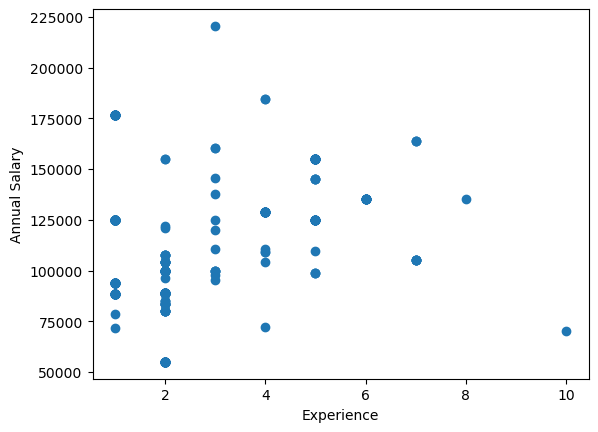

In [75]:
p = var1
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

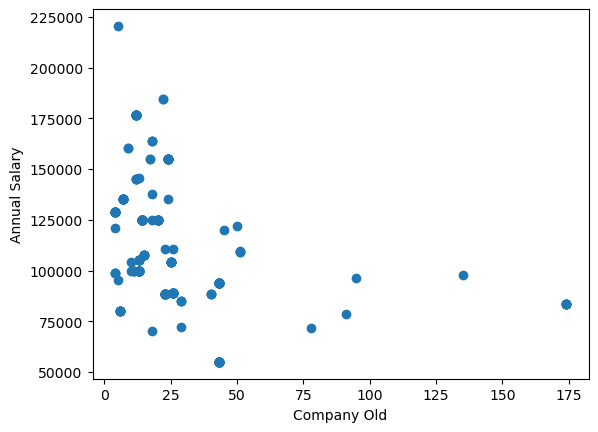

In [76]:
p = var2
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

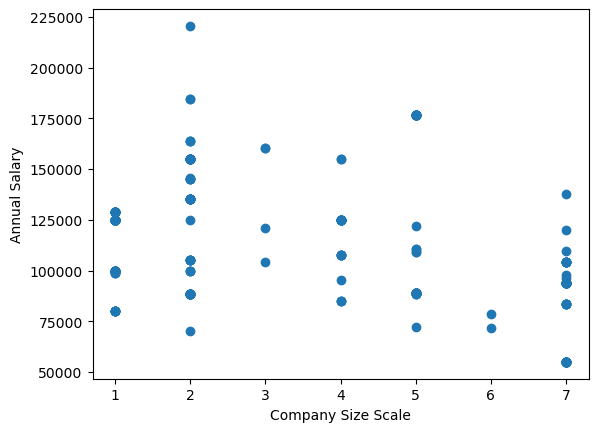

In [77]:
p = var3
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')

Text(0, 0.5, 'Annual Salary')

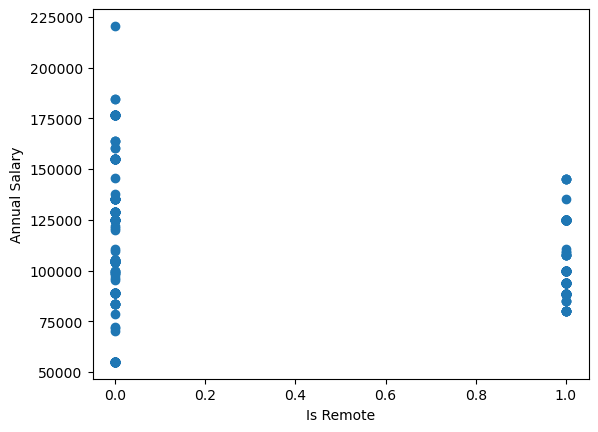

In [80]:
p = var4
pyplot.scatter(data[p], data['Annual Salary'])

pyplot.xlabel(p)
pyplot.ylabel('Annual Salary')
